In [1]:
import experiments.runners as runners

from tabpfn import TabPFNClassifier
from sklearn.ensemble import RandomForestClassifier
from data import load_us_perm_visas 

rf_model = RandomForestClassifier()
pfn_model = TabPFNClassifier()

In [2]:
new_run = runners.run(rf_model, load_us_perm_visas)

loading data
trying get pipeline
RandomForest model detected.


In [6]:
new_run.pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('datetime',
                                                  DatetimeFeatureEncoder(features=['year',
                                                                                   'month',
                                                                                   'day',
                                                                                   'weekday',
                                                                                   'quarter',
                                                                                   'hour',
                                                                                   'minute',
                                                                                   'is_weekend',
                                                                                   'is_month_start',
                                                                                   'is_month_end',
                                                                                   'day_of_year']),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x177905dc0>),
                                                 ('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x177c507d0>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x17a8231a0>)])),
                ('classifier', RandomForestClassifier())])

In [6]:
import warnings
# Ignore FutureWarning, of which TabPFNClassifier has a lot!
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
new_run.fit()

Fitting model...
does this thing have datetimes? True
<class 'pandas.core.series.Series'>
Index: 213700 entries, 9880 to 126378
Series name: decision_date
Non-Null Count   Dtype         
--------------   -----         
213700 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB
None
here is the encoded X
        year  month_sin     month_cos   day_sin   day_cos  weekday_sin  \
9880    2011  -0.866025  5.000000e-01 -0.571268  0.820763    -0.433884   
332404  2016  -0.866025 -5.000000e-01  0.968077 -0.250653     0.781831   
347023  2016  -1.000000 -1.836970e-16 -0.968077 -0.250653     0.433884   
298526  2016   0.500000 -8.660254e-01  0.897805 -0.440394     0.781831   
22335   2012  -0.866025  5.000000e-01  0.848644  0.528964    -0.433884   

        weekday_cos  
9880      -0.900969  
332404     0.623490  
347023    -0.900969  
298526     0.623490  
22335     -0.900969  


KeyboardInterrupt: 

In [8]:
new_run.predict()

does this thing have datetimes? True
<class 'pandas.core.series.Series'>
Index: 142468 entries, 312025 to 205062
Series name: decision_date
Non-Null Count   Dtype         
--------------   -----         
142468 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.2 MB
None
<class 'pandas.core.series.Series'>
does this thing have datetimes NOW? True
DONE: RandomForestClassifier predict


Accuracy 0.9473074655361204
F1 Score: 0.7105580221153184

Classification Report:
              precision    recall  f1-score   support

   certified      0.948     0.998     0.972    132174
      denied      0.919     0.297     0.449     10294

    accuracy                          0.947    142468
   macro avg      0.934     0.647     0.711    142468
weighted avg      0.946     0.947     0.935    142468



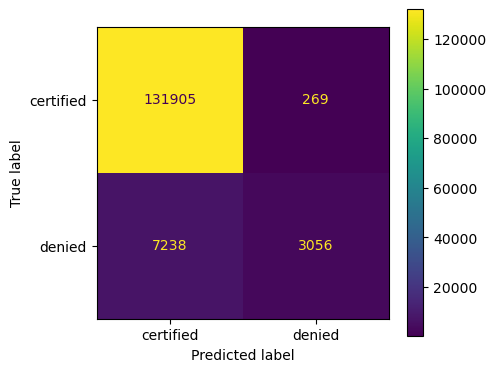

In [9]:
new_run.score()

## Codeexamples

### label coder example

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric values
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
predictions_encoded = le.transform(predictions)

# Now calculate F1 score with numeric labels
print("F1 Score:", f1_score(y_test_encoded, predictions_encoded))

### Dan's random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
predictions_rf = model.predict(X_test)

### Dan's catboost

In [ ]:
# if you don't have GPU and cuda, change task_type
# note: catboost requires python 3.12, so need to set up a new evironment (ok, since tabpfn requires only python > 3.9)
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           devices='0:1')#, class_weights=class_weights)
model.fit(X_res,
          y_res)